<a href="https://colab.research.google.com/github/akshith7110/IMDb-Sentiment-Analysis/blob/main/IMDb_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import time
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [2]:
try:
    df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
except FileNotFoundError:
    print("Error: 'IMDb Dataset.csv' not found. Please upload the file.")
    exit()

In [3]:
print(f"Dataset shape: {df.shape}\n")

print("First 5 rows:")
print(df.head())
print("\n" + "="*50 + "\n")

print("Missing values per column:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

print("Sentiment distribution:")
print(df['sentiment'].value_counts())

Dataset shape: (50000, 2)

First 5 rows:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


Missing values per column:
review       0
sentiment    0
dtype: int64


Sentiment distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


/tmp/ipython-input-2114697589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette="pastel")


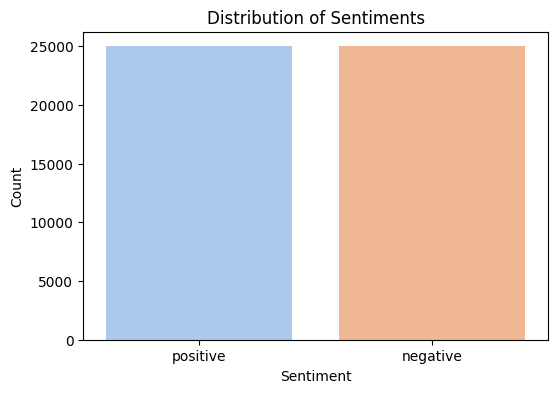

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette="pastel")
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
print("\n" + "="*50 + "\n")


In [5]:
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

In [6]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"[^a-z]", " ", text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

In [7]:
print("\n Cleaning and preprocessing text data:")
start_time = time.time()
df['cleaned_review'] = df['review'].apply(clean_text)
end_time = time.time()
print(f" Text cleaning completed in {end_time - start_time:.2f} seconds.")


 Cleaning and preprocessing text data... (This may take a few minutes)
 Text cleaning completed in 7.00 seconds.


In [8]:
print("Original Review:")
print(df["review"][0])
print("\nCleaned Review:")
print(df["cleaned_review"][0])
print("\n" + "="*50 + "\n")

Original Review:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show 

In [9]:
print("Feature Engineering with TF-IDF")

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["cleaned_review"])

--- Feature Engineering with TF-IDF ---


In [10]:
encoder = LabelEncoder()
y = encoder.fit_transform(df["sentiment"])

In [11]:
print(f"Shape of feature matrix X: {X.shape}")
print(f"Shape of label vector y: {y.shape}")
print("\nExample encoded labels:")
print(f"Original: {df['sentiment'].head(3).tolist()}, Encoded: {y[:3]}")

Shape of feature matrix X: (50000, 5000)
Shape of label vector y: (50000,)

Example encoded labels:
Original: ['positive', 'positive', 'positive'], Encoded: [1 1 1]


In [12]:
print("\n Splitting data into 80% train and 20% test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(" Data splitting complete.")


 Splitting data into 80% train and 20% test sets...
 Data splitting complete.


In [13]:
print("\n Training & Evaluating: Logistic Regression")
start_time = time.time()
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds.")


--- Training & Evaluating: Logistic Regression ---
Training completed in 0.51 seconds.


In [14]:
y_pred_lr = log_reg_model.predict(X_test)
print("\n Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr, target_names=['Negative', 'Positive']))


 Classification Report (Logistic Regression):
              precision    recall  f1-score   support

    Negative       0.90      0.88      0.89      5000
    Positive       0.89      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000




--- Training & Evaluating: Support Vector Machine (Optimized with LinearSVC) ---
✅ Training completed in 1.37 seconds.

📊 Classification Report (SVM):
              precision    recall  f1-score   support

    Negative       0.89      0.88      0.88      5000
    Positive       0.88      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



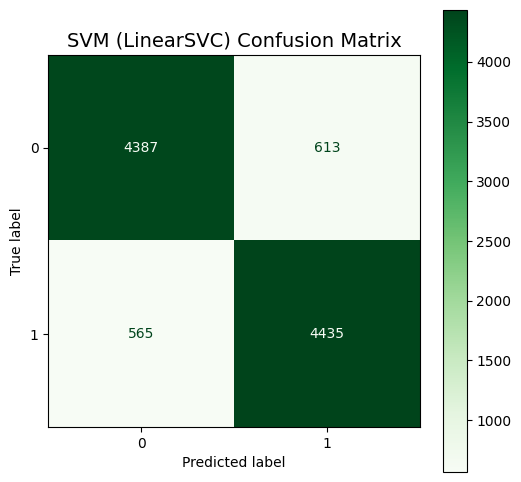

--------------------------------------------------


In [15]:
from sklearn.svm import LinearSVC

print("\n Training & Evaluating: Support Vector Machine")
start_time = time.time()

svm_model = LinearSVC(max_iter=2000)

svm_model.fit(X_train, y_train)
end_time = time.time()
print(f" Training completed in {end_time - start_time:.2f} seconds.")

y_pred_svm = svm_model.predict(X_test)
print("\n📊 Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=['Negative', 'Positive']))

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("SVM (LinearSVC) Confusion Matrix", fontsize=14)
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, ax=ax, cmap='Greens', values_format='d')
plt.show()
print("-" * 50)


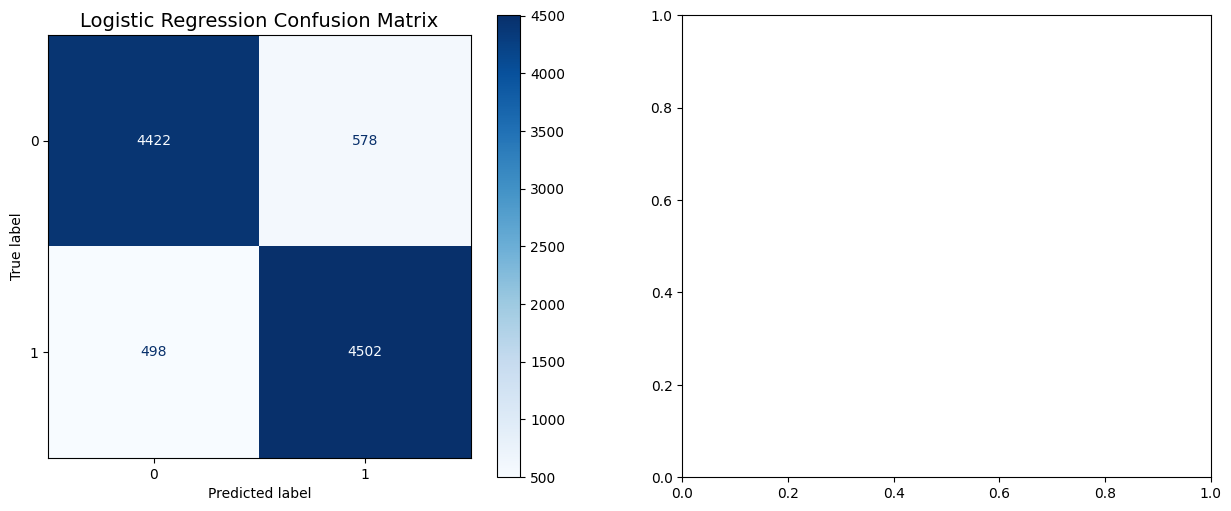

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title("Logistic Regression Confusion Matrix", fontsize=14)
ConfusionMatrixDisplay.from_estimator(log_reg_model, X_test, y_test, ax=axes[0], cmap='Blues', values_format='d')


In [17]:
axes[1].set_title("SVM Confusion Matrix", fontsize=14)
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, ax=axes[1], cmap='Greens', values_format='d')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [18]:
metrics = {}
models = {'Logistic Regression': y_pred_lr, 'SVM': y_pred_svm}
for model_name, y_pred in models.items():
    metrics[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

In [19]:
metrics_df = pd.DataFrame(metrics).T
print("\n Model Comparison Metrics:")
print(metrics_df)



📈 Model Comparison Metrics:
                     Accuracy  Precision  Recall  F1-Score
Logistic Regression    0.8924   0.886220  0.9004  0.893254
SVM                    0.8822   0.878566  0.8870  0.882763


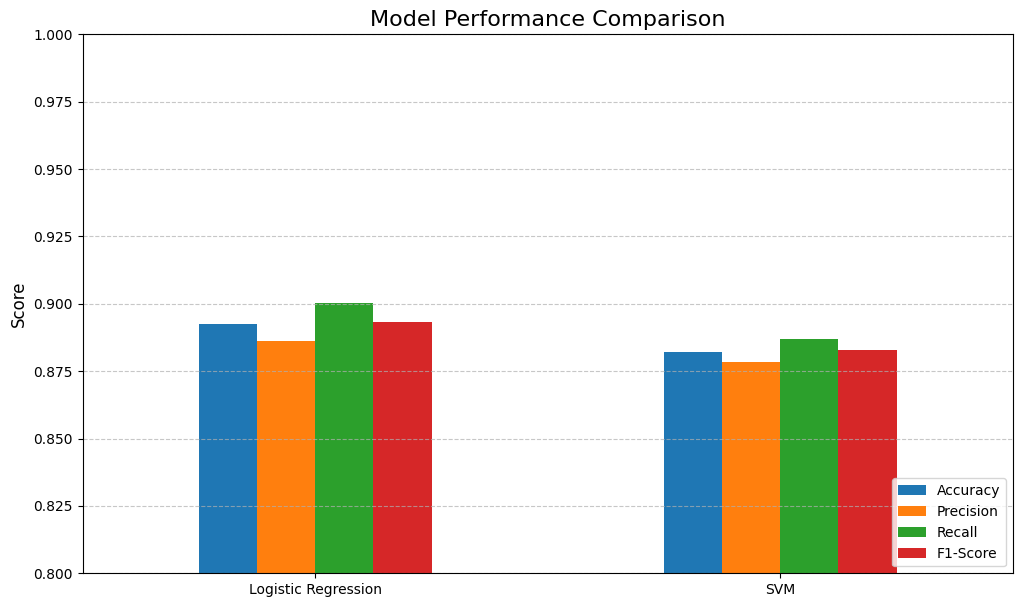

In [20]:
metrics_df.plot(kind='bar', figsize=(12, 7), rot=0)
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.ylim(0.8, 1.0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()